# Part I: Least squares method

Suppose we are given a dataset $\mathcal{D} = \{x_i,y_i\}_{i=1}^m$ and we suspect $y(x)$ dependency to be linear.

Suppose that $y(x) = \alpha x + \beta$. In that case we choose $(\alpha,\beta)$ such that:
$$
\alpha,\beta = \arg\min_{\alpha,\beta} f(\alpha,\beta), \; f(\alpha,\beta):= \sum_{k=1}^m (\alpha x_k + \beta - y_k)^2 
$$

Using condition $\nabla_{(\alpha,\beta)} f=\boldsymbol{0}$ we arrive at an equation:
$$
\begin{bmatrix}
\sum_{k=1}^m x_k^2 & \sum_{k=1}^m x_k \\ \sum_{k=1}^m x_k & m
\end{bmatrix} \begin{bmatrix}
\alpha \\ \beta
\end{bmatrix} = \begin{bmatrix}
\sum_{k=1}^m x_ky_k \\ \sum_{k=1}^m y_k
\end{bmatrix}
$$

### Task.
Choose 4-5 points lying almost on the same line and apply a least square method to find a line that approximate $y(x)$ dependency.

**Solution**. To check how this method works, we fixate $\alpha,\beta$ and then choose a set of points:
$$
\{x_i, f(x_i) + \mathcal{N}(x_i \mid 0, \sigma)\}_{i=1}^m
$$

where $f(x_i)=\alpha x_i+\beta$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_points(slope, y_intercept, interval=(0,1), noise_strength=0, points_num=100):
    """
    generate_points generates a list of points along t
    Input:
    slope, y_intercept - coefficients of line ax+b
    interval - an array with 2 elements representing a segment on which plot points
    noise_strength - a sigma value being used in gauss noise
    points_num - number of points to generate
    
    Output:
    X, Y - a set of x and y points, respectively
    """
    
    a, b = interval    
    X = np.arange(a, b, (b-a)/points_num)
    Y = slope*X + y_intercept
    Y = Y + np.random.normal(loc=0, scale=noise_strength, size=len(X))
    return X, Y

Then we find $\alpha,\beta$ according to the method described above

In [3]:
def least_squares_method(X, Y):
    """
    least_squares_method returns a slope and y-intercept of a 
    line after applying least squares method on a set of points X, Y
    
    Input:
    X, Y - set of x and y coordinates
    
    Output:
    slope, y_intercept - coefficient a and b, respectively, in line equation y=ax+b
    """
    
    m = len(X)
    sx2 = np.sum(X**2)
    sx = np.sum(X)
    sxy = np.sum(X*Y)
    sy = np.sum(Y)
    M = np.array([[sx2, sx],
                  [sx,  m]])
    b = np.array([sxy, sy])
    slope, y_intercept = np.linalg.solve(M, b)
    return slope, y_intercept

We then draw these points and our solution:

y-intercept is 1.9834390037829666 and slope is 2.0536256833664956


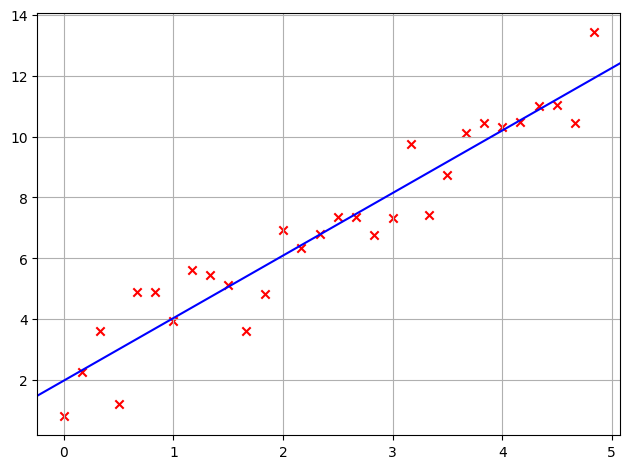

In [4]:
X, Y = generate_points(2.3, 1.2, interval=(0,5), noise_strength=1.0, points_num=30)
alpha, beta = least_squares_method(X, Y)

fig, ax = plt.subplots()
ax.grid()
ax.scatter(X, Y, marker='x', color='red')
ax.axline([0, beta], slope=alpha, color='blue')
plt.tight_layout()

print('y-intercept is {} and slope is {}'.format(beta, alpha))

# Part II: More Complicated Dependence

Suppose we have the dataset $\mathcal{D} = \{x_i, y_i\}_{i=1}^m$ and we suspect that the dependence between $x$ and $y$ is polynomial with a degree of $5$. However, in reality, the dependence turns out to be

$$
y(x) = x \sin x
$$

We try to see how `curve_fit` works in this scenario.

In [8]:
from scipy.optimize import curve_fit

In [6]:
def fn(x: np.float32) -> np.float32:
    """
    Calculates x * sin(x), which is a true dependence in the task
    """
    
    return x * np.sin(x)

def generate_points(fn: callable, interval=(0,9), noise_strength=0, points_num=100):
    """
    generate_points generates a list of points along t
    Input:
    slope, y_intercept - coefficients of line ax+b
    interval - an array with 2 elements representing a segment on which plot points
    noise_strength - a sigma value being used in gauss noise
    points_num - number of points to generate
    
    Output:
    X, Y - a set of x and y points, respectively
    """
    
    a, b = interval    
    X = np.arange(a, b, (b-a)/points_num)
    Y = fn(X)
    Y = Y + np.random.normal(loc=0, scale=noise_strength, size=len(X))
    return X, Y

Now, we will use `curve_fit` to find the suitable curve

In [9]:
def prediction_fn(x, a0, a1, a2, a3, a4, a5):
    """
    Function that we suspect is close to our real dependence
    """
    return a0 + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4) + a5*(x**5)

y-intercept is 1.9834390037829666 and slope is 2.0536256833664956


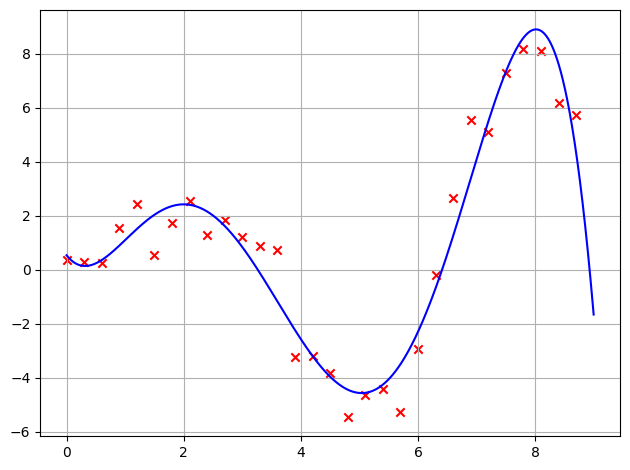

In [16]:
# Generating random points
X, Y = generate_points(fn, interval=(0, 9), noise_strength=1.0, points_num=30)

# Fitting the curve via curve_fit from scipy
p, _ = curve_fit(prediction_fn, X, Y)
p_fn = lambda x: p[0] + p[1]*x + p[2]*(x**2) + p[3]*(x**3) + p[4]*(x**4) + p[5]*(x**5)

# Preparing the plot and plotting our dataset
fig, ax = plt.subplots()
ax.grid()
ax.scatter(X, Y, marker='x', color='red')

# Plotting our predicted dependence
plot_points_num = 1000
plot_x_domain = np.arange(0, 9, 9 / plot_points_num)
ax.plot(plot_x_domain, p_fn(plot_x_domain), color='blue')

plt.tight_layout()

print('y-intercept is {} and slope is {}'.format(beta, alpha))